In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import glob, os, random

import pandas as pd 
import re

print('setup successful!')

setup successful!


In [ ]:
base_path = '/content/drive/MyDrive/Garbage classification'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2547


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
categories = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

print('defining constants successful!')

defining constants successful!


In [ ]:

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path +'/' + categories[category])
    
    filenames_list = filenames_list  +filenames
    categories_list = categories_list + [category] * len(filenames)
    
df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df = add_class_name_prefix(df, 'filename')

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

print('number of elements = ' , len(df))

number of elements =  2547


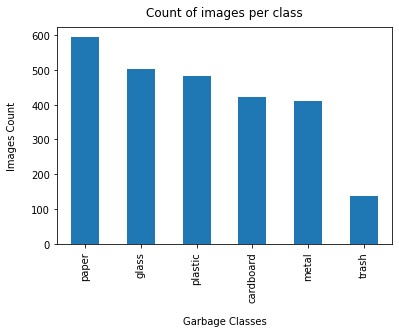

In [ ]:
df_visualization = df.copy()
# Change the catgegories from numbers to names
df_visualization['category'] = df_visualization['category'].apply(lambda x:categories[x] )

df_visualization['category'].value_counts().plot.bar(x = 'count', y = 'category' )

plt.xlabel("Garbage Classes", labelpad=14)
plt.ylabel("Images Count", labelpad=14)
plt.title("Count of images per class", y=1.02);

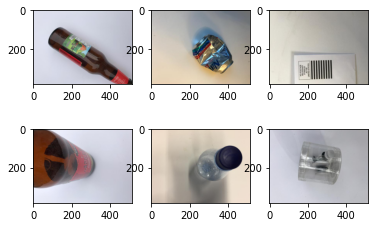

In [ ]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2294 images belonging to 6 classes.
Found 253 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

In [ ]:
history = model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
144/144 [==============================] - 894s 6s/step - loss: 1.7354 - acc: 0.2223 - val_loss: 1.6104 - val_acc: 0.2688
Epoch 2/20
144/144 [==============================] - 364s 3s/step - loss: 1.5243 - acc: 0.3775 - val_loss: 1.4818 - val_acc: 0.3874
Epoch 3/20
144/144 [==============================] - 364s 3s/step - loss: 1.3690 - acc: 0.4377 - val_loss: 1.3943 - val_acc: 0.4190
Epoch 4/20
144/144 [==============================] - 364s 3s/step - loss: 1.3377 - acc: 0.4525 - val_loss: 1.4174 - val_acc: 0.4308
Epoch 5/20
144/144 [==============================] - 362s 3s/step - loss: 1.2608 - acc: 0.4908 - val_loss: 1.3476 - val_acc: 0.4664
Epoch 6/20
144/144 [==============================] - 362s 3s/step - loss: 1.2335 - acc: 0.4961 - val_loss: 1.3142 - val_acc: 0.4625
Epoch 7/20
144/144 [==============================] - 366s 3s/step - loss: 1.1757 - acc: 0.5436 - val_loss: 1.4437 - val_acc: 0.4506
Epoch 8/20
144/144 [==============================] - 361s 3s/step - 

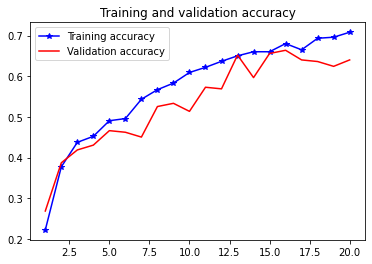

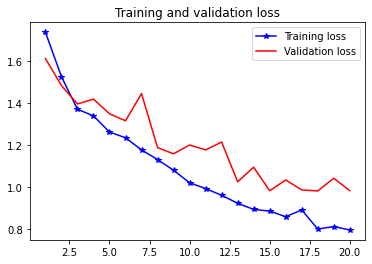

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

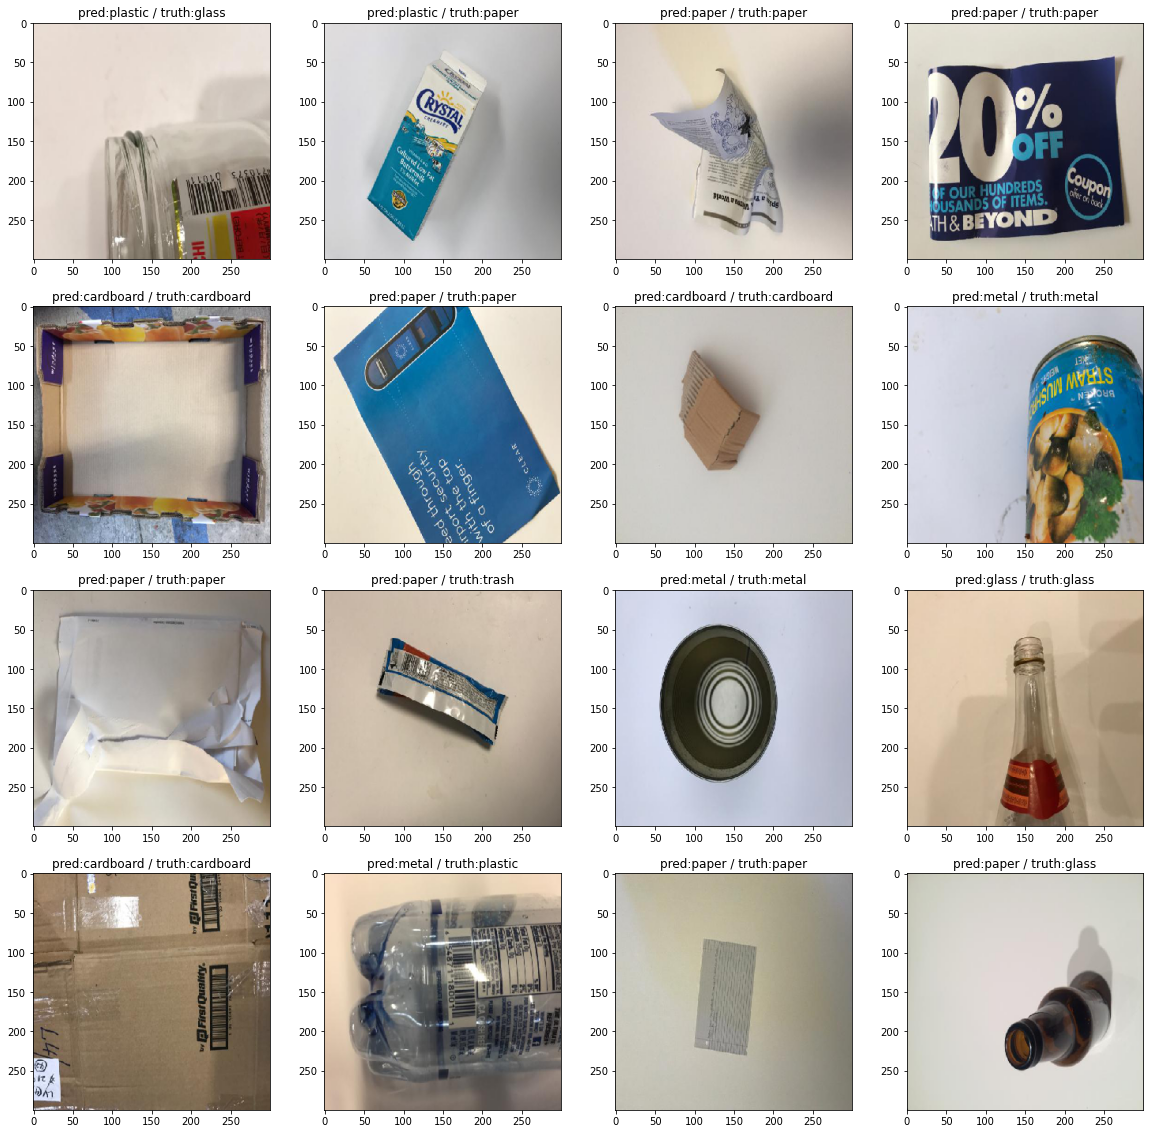

In [ ]:
test_x, test_y = validation_generator.__getitem__(1)
# test_x is used to train the data
# test_y refers to the actual answer of the testing set data
# preds refers to the predicted class
preds = model.predict(test_x)

plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])
#shows some testing results

In [ ]:
# to find the accuracy of the model on the training using the image.

print("-- Evaluate --")
scores = model.evaluate_generator(validation_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


acc: 62.50%


In [ ]:
# produce a table to find out the details of the model
test_true = np.argmax(test_y, axis=1)
test_pred = np.argmax(preds, axis=1)
print(classification_report(test_true, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.33      0.50         3
           2       0.67      1.00      0.80         2
           3       0.71      0.83      0.77         6
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.69        16
   macro avg       0.56      0.53      0.51        16
weighted avg       0.73      0.69      0.67        16



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split

#Change the categories from numbers to names
df["category"] = df["category"].replace(categories) 

# We first split the data into two sets and then split the validate_df to two sets
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)
validate_df, test_df = train_test_split(validate_df, test_size=0.5, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

print('train size = ', total_validate , 'validate size = ', total_validate, 'test size = ', test_df.shape[0])

train size =  255 validate size =  255 test size =  255


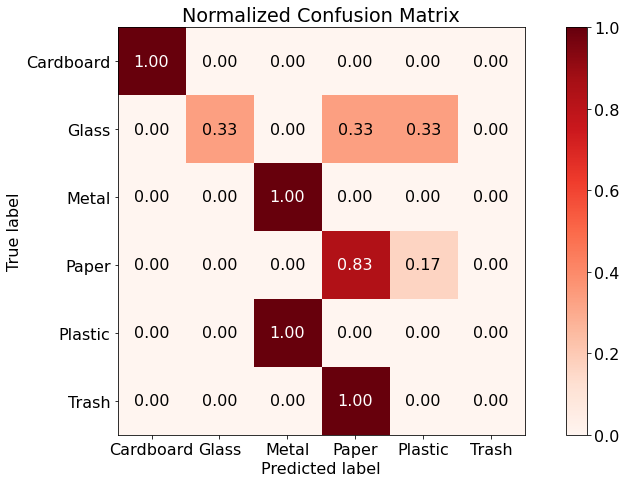

In [ ]:
# produce the confusion matrix of the results (normalized)
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(test_true, test_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #Printing the table
    fig, ax = plt.subplots(figsize=(12,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, 
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plt.rc('font', family='DejaVu Sans', size=16)
classes = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash']
# Plot normalized confusion matrix
plot_confusion_matrix(test_true, test_pred, classes=classes, normalize=True, title='Normalized Confusion Matrix')
plt.show()
# Plot the unnormalized confusion matrix
#plot_confusion_matrix(test_true, test_pred, classes=classes, normalize=False, title='Unnormalized Confusion Matrix')
#plt.show()

In [ ]:
# the value from the confusion matrix to compute the accuracy of each class
from sklearn.metrics import confusion_matrix

predictions_one_hot = model.predict(test_x)
cm = confusion_matrix(test_true, test_pred)
print(cm)

[[3 0 0 0 0 0]
 [0 1 0 1 1 0]
 [0 0 2 0 0 0]
 [0 0 0 5 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]]


In [ ]:
# to identify the accuracy of each class 
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard Glass Metal Paper Plastic Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)

Cardboard Glass Metal Paper Plastic Trash
[1.     0.875  0.9375 0.8125 0.8125 0.9375]
